# Illustrates the use of the WR (Weather Regime) class for a single proxy

In [1]:
%matplotlib inline

In [2]:
import os 
import sys
import pathlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import the development version of paleopy

In [4]:
from paleopy import proxy
from paleopy import analogs
from paleopy import WR

### determine the current working directory 

In [5]:
cwd = pathlib.Path.cwd() 

In [6]:
print(cwd)

/home/nicolasf/research/PICT_notebooks/notebooks


#### defines the folder where the JSON files are (for the datasets) and where to save the proxy JSON files

In [7]:
djsons = cwd.parent.joinpath('jsons')

In [8]:
pjsons = djsons.joinpath('proxies')

### instantiates a proxy with the required parameters

In [9]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = True, \
          detrend = True)

### find the analogs

In [10]:
p.find_analogs()

### print the updated proxy features

In [11]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2019)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'slope': 0.022069378447875616, 'intercept': -44.105259409362375}
category:WA
analog_years:[1982, 1994, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.13783501335974088, 0.14217311248257797, 0.13208010210728532, 0.10404673433198279, 0.11468950854914021, 0.1302975275719365, 0.11943878543179427, 0.11943921616554208]
}


### Now instantiates a `WR` (Weather Regime) class, passing the newly created ensemble object, and the classification of interest 

In [12]:
w = WR(p, classification='New Zealand (Kidson 2000)')

### plots the bar plot, significance level = 99%, the anomalies in frequency significant at the corresponding level are marked with the black border and the more intense color 

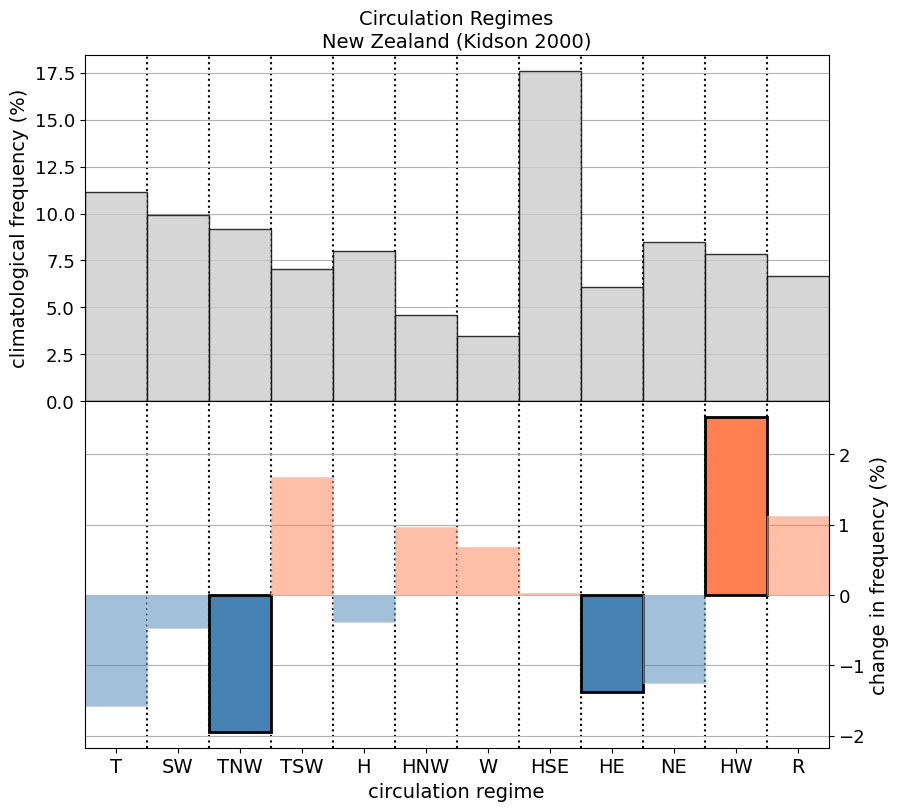

In [13]:
f, axes = w.plot_bar(sig=1)

### same example as above but for the SW Pacific regime decomposition 

In [14]:
w = WR(p, classification='SW Pacific (Lorrey and Fauchereau 2018)')

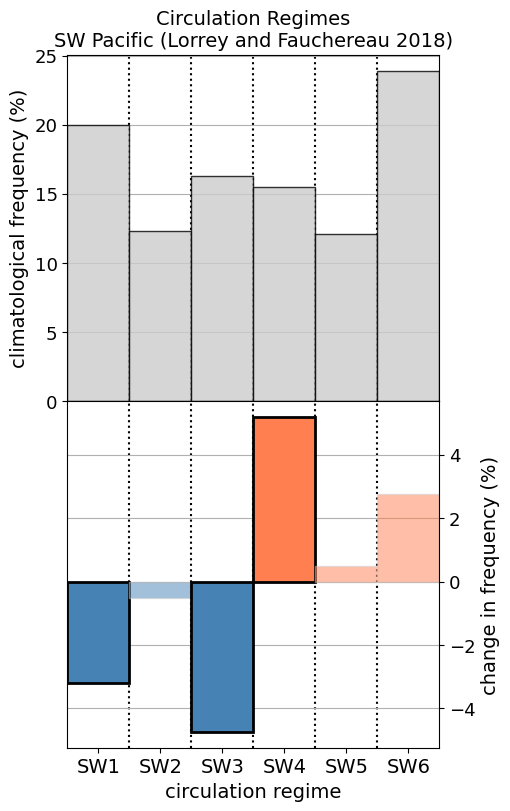

In [15]:
f, axes = w.plot_bar(sig=1)

In [16]:
w = WR(p, classification='New Zealand (Rampal et al. 2022)')

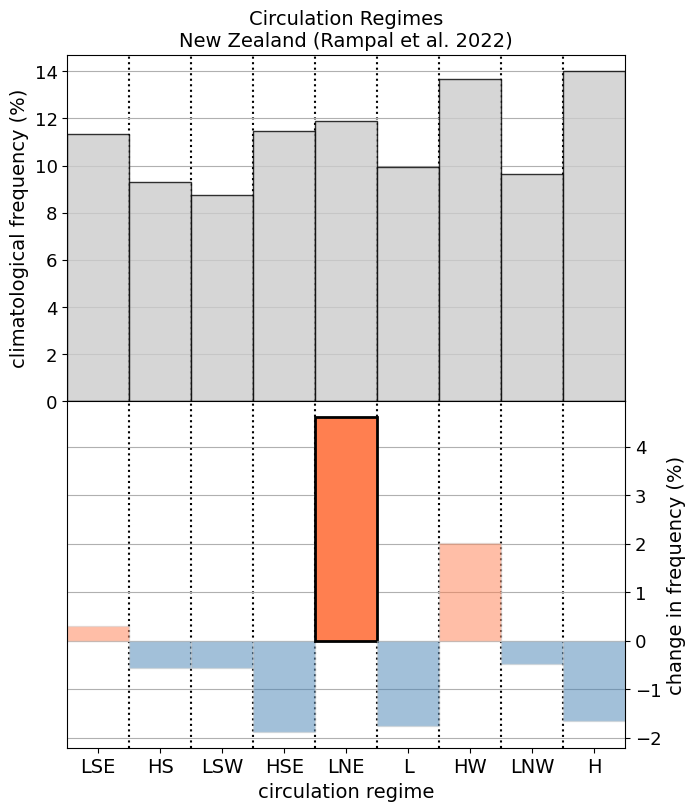

In [17]:
f, axes = w.plot_bar(sig=1)

In [18]:
w.df_probs

,Rarotonga,10,90,5,95,1,99
LSE,0.116505,0.103936,0.125716,0.100879,0.128773,0.096672,0.133363
HS,0.087379,0.084448,0.110050,0.081754,0.115017,0.075273,0.122667
LSW,0.081831,0.075659,0.098968,0.072984,0.102025,0.068013,0.108525
HSE,0.095700,0.102025,0.123424,0.098968,0.126099,0.092465,0.131070
LNE,0.165049,0.102407,0.131448,0.098204,0.136034,0.091322,0.142147
L,0.081831,0.087505,0.115781,0.084429,0.119603,0.077570,0.128013
HW,0.156727,0.122621,0.147879,0.118074,0.152083,0.110428,0.160115
LNW,0.091540,0.082537,0.105846,0.079079,0.109285,0.073366,0.116546
H,0.123440,0.127245,0.156668,0.123787,0.160871,0.115778,0.168135


In [19]:
w.df_anoms * 100

,Rarotonga
LSE,0.309518
HS,-0.571334
LSW,-0.572000
HSE,-1.881750
LNE,4.609768
L,-1.754121
HW,2.004409
LNW,-0.487717
H,-1.656772


In [20]:
w = WR(p, classification='Ross Sea (Cohen et al. 2013)')

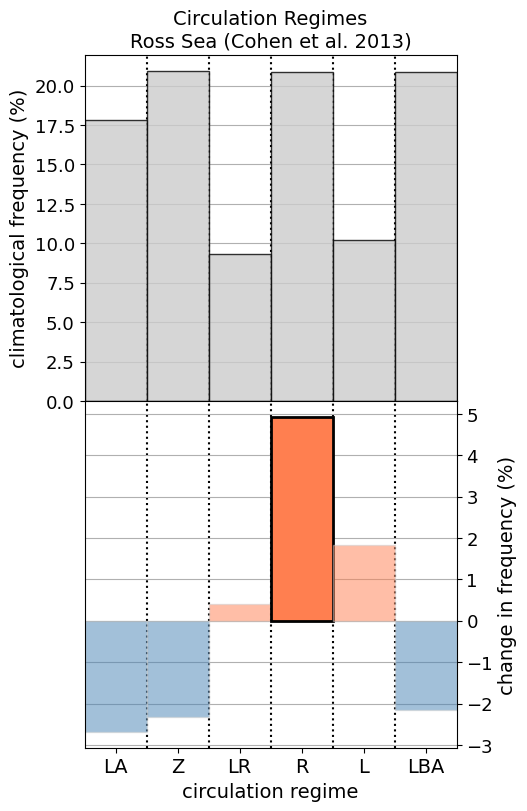

In [21]:
f, axes = w.plot_bar(sig=1)

In [22]:
axes[0].set_title('lkjlkjlk')

Text(0.5, 1.0, 'lkjlkjlk')

,Rarotonga,10,90,5,95,1,99
LA,0.151179,0.160489,0.192587,0.155904,0.197172,0.144436,0.206725
Z,0.185853,0.190638,0.232709,0.184180,0.239587,0.174624,0.248380
LR,0.097087,0.078334,0.105464,0.073749,0.110432,0.069541,0.117700
R,0.257975,0.189912,0.226977,0.185308,0.230799,0.176144,0.241127
L,0.120666,0.085976,0.114635,0.082155,0.118838,0.073741,0.127245
LBA,0.187240,0.192587,0.234238,0.186072,0.239606,0.175751,0.249526


In [27]:
clim_probs = w._get_clim_probs()

In [28]:
clim_probs

LA     0.178057
Z      0.209088
LR     0.093092
R      0.208718
L      0.102327
LBA    0.208718
dtype: float64